In [1]:
parent = "C:/Users/hhich/OneDrive/Desktop/folder/data"

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential
from keras.applications.mobilenet_v2 import MobileNetV2
import tensorflow as tf 


In [3]:
# config = tf.compat.v1.ConfigProto()
# config.gpu_options.allow_growth = True
# sess = tf.compat.v1.Session(config=config)


In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   zoom_range=0.05,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   brightness_range=[0.5, 1.4],
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(directory=parent,
                                                    batch_size=5,
                                                    target_size=(224, 224),
                                                    shuffle=True,
                                                    class_mode="binary",
                                                    subset="training")

validation_generator = train_datagen.flow_from_directory(directory=parent,
                                                         batch_size=5,
                                                         target_size=(
                                                             224, 224),
                                                         shuffle=False,
                                                         class_mode="binary",
                                                         subset="validation")


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [5]:
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(rate=0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.00008),
               loss="binary_crossentropy",
               metrics=["accuracy"])


In [6]:
history = model.fit(train_generator, epochs=20, 
                    batch_size=5 ,
                    validation_data=validation_generator)


Epoch 1/20
41/41 [==============================] - 11s 197ms/step - loss: 0.5570 - accuracy: 0.6847 - val_loss: 0.3559 - val_accuracy: 0.9000
Epoch 2/20
41/41 [==============================] - 6s 146ms/step - loss: 0.3648 - accuracy: 0.8916 - val_loss: 0.2687 - val_accuracy: 0.9200
Epoch 3/20
41/41 [==============================] - 5s 131ms/step - loss: 0.2973 - accuracy: 0.9064 - val_loss: 0.2219 - val_accuracy: 0.9200
Epoch 4/20
41/41 [==============================] - 5s 129ms/step - loss: 0.2953 - accuracy: 0.8867 - val_loss: 0.2363 - val_accuracy: 0.8800
Epoch 5/20
41/41 [==============================] - 6s 137ms/step - loss: 0.2677 - accuracy: 0.9064 - val_loss: 0.1812 - val_accuracy: 0.9400
Epoch 6/20
41/41 [==============================] - 6s 148ms/step - loss: 0.2118 - accuracy: 0.9310 - val_loss: 0.2137 - val_accuracy: 0.9200
Epoch 7/20
41/41 [==============================] - 6s 139ms/step - loss: 0.2368 - accuracy: 0.8966 - val_loss: 0.2151 - val_accuracy: 0.9200
Epoch

In [7]:
model.evaluate(validation_generator)

10/10 [==============================] - 1s 94ms/step - loss: 0.2168 - accuracy: 0.9000


[0.21679919958114624, 0.8999999761581421]

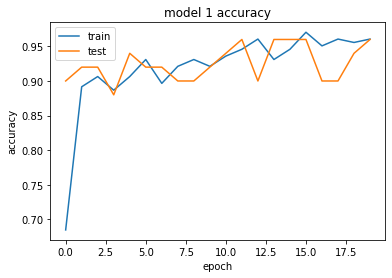

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model 1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


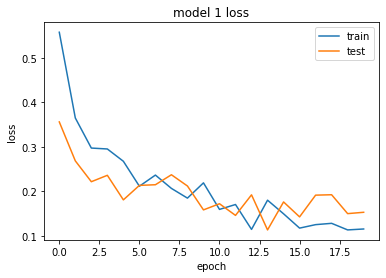

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()


In [10]:
import tensorflow as tf

if tf.test.gpu_device_name():

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")


Please install GPU version of TF
